<a href="https://colab.research.google.com/github/sourabhsingh282/stockprice_prediction_LSTM_GRU/blob/main/stock_market_price_predicrtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the data

have a look on it 

it is a time series data of s&p 500 

splitting the dataset into train and test

taking a small part of the training data into validation 

doing some preprocessing 

training with rnn
testing and validating 
finding mse mae 


training with gru

testing and validating 

finding mse mae 

training with lstm

testing and validating 

finding mse mae 

training with hybride of lastm and  gru with drop out

testing and validating 

finding mse mae 

concluding the best model by look the the mse and mae value

taking further that model for deployement



In [148]:
!pip install keras-tuner

In [149]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

###importing libraries

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## data loading and preprocessing 

In [151]:
df= pd.read_csv('/content/S&P dataset.csv')

In [152]:
df.describe

<bound method NDFrame.describe of             Date         Open  ...    Adj Close      Volume
0     2000-01-03  1469.250000  ...  1455.219971   931800000
1     2000-01-04  1455.219971  ...  1399.420044  1009000000
2     2000-01-05  1399.420044  ...  1402.109985  1085500000
3     2000-01-06  1402.109985  ...  1403.449951  1092300000
4     2000-01-07  1403.449951  ...  1441.469971  1225200000
...          ...          ...  ...          ...         ...
5212  2020-09-21  3285.570068  ...  3281.060059  4828350000
5213  2020-09-22  3295.750000  ...  3315.570068  3963300000
5214  2020-09-23  3320.110107  ...  3236.919922  4364500000
5215  2020-09-24  3226.139893  ...  3246.590088  4599470000
5216  2020-09-25  3236.659912  ...  3298.459961  3792220000

[5217 rows x 7 columns]>

In [153]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [154]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5212,2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000
5213,2020-09-22,3295.750000,3320.310059,3270.949951,3315.570068,3315.570068,3963300000
5214,2020-09-23,3320.110107,3323.350098,3232.570068,3236.919922,3236.919922,4364500000
5215,2020-09-24,3226.139893,3278.699951,3209.449951,3246.590088,3246.590088,4599470000
5216,2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000


In [155]:
df["Date"] = pd.to_datetime(df["Date"])


In [156]:
df = df.set_index("Date") 
print(df.shape)
print(df.columns)

(5217, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [157]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


 ## data visualization and Analysation

 



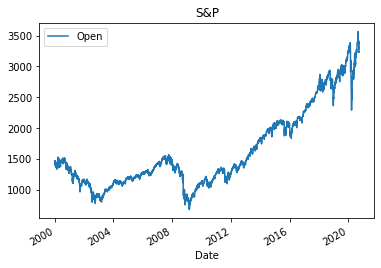

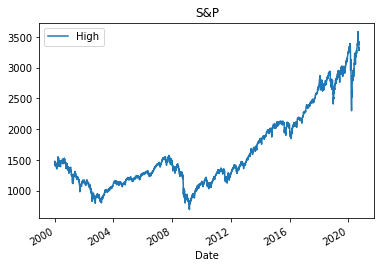

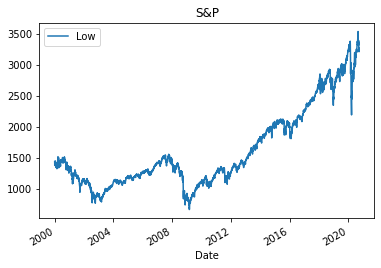

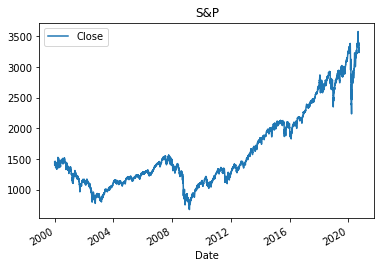

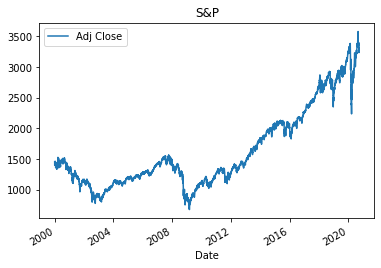

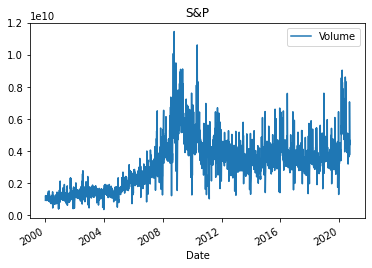

In [158]:
#plotting the every index plot with respect to date
for i in  df.columns:
  df[[i]].plot()
  plt.title("S&P")
  plt.show()

Text(0.5, 1.0, 'S&P Cumulative Returns')

<Figure size 1440x1440 with 0 Axes>

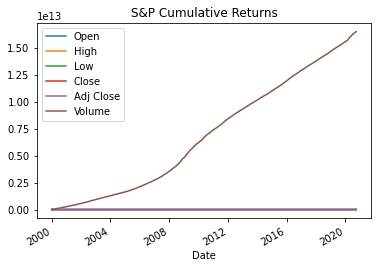

In [159]:
# Comulative Return
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.title('S&P Cumulative Returns')

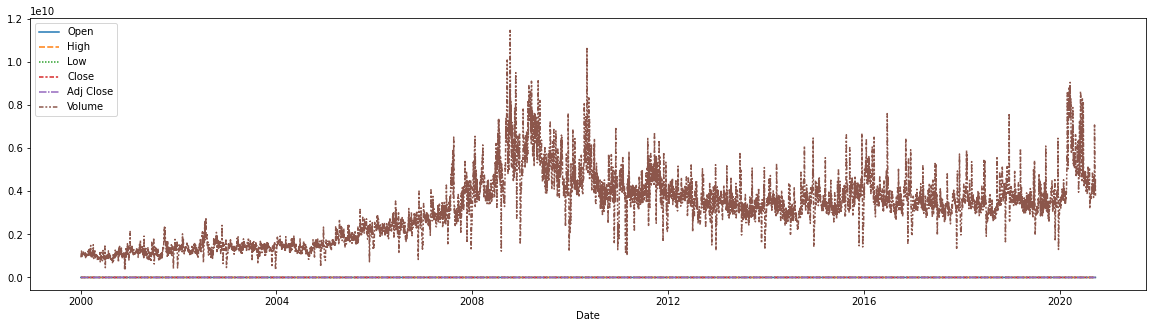

In [160]:
#ploting the line plot to see the trend in data set
plt.figure(figsize=(20,5))
sns.lineplot(data =df,)

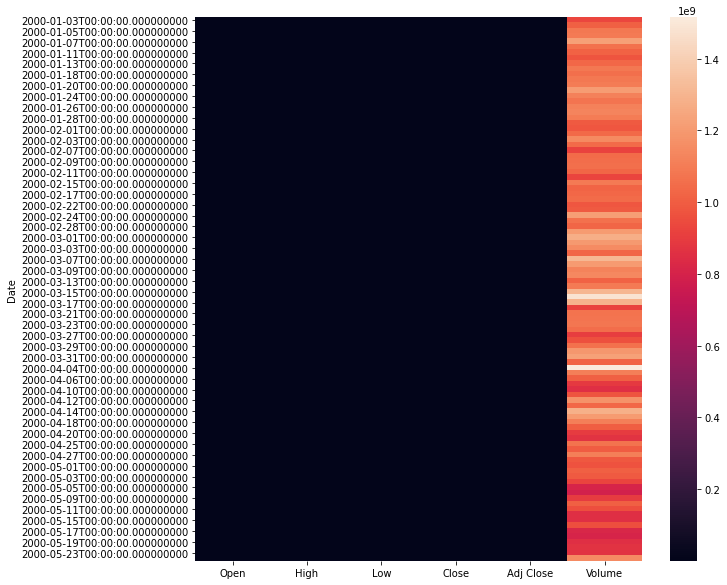

In [161]:
#drawing the heat map 
plt.figure(figsize=(10,10))
sns.heatmap(df[:100],   robust=False,
                annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, 
                 square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

(array([[5., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 array([1.37768005e+03, 1.22521240e+08, 2.45041102e+08, 3.67560964e+08,
        4.90080827e+08, 6.12600689e+08, 7.35120551e+08, 8.57640413e+08,
        9.80160276e+08, 1.10268014e+09, 1.22520000e+09]),
 <a list of 10 Lists of Patches objects>)

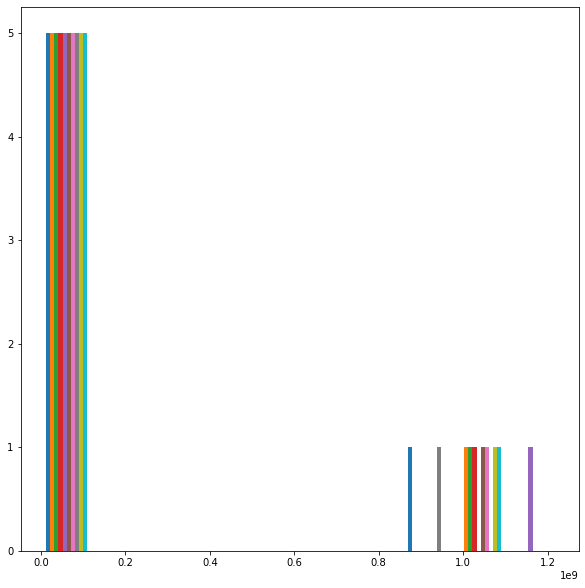

In [162]:
# histogram
plt.figure(figsize=(10,10))
plt.hist(df[:10],
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

#data splitting and feature engineering

#now we will start the preprocessing of the data

In [163]:
#LSTM is very sensitive neural network so we have to normalize the data set in the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)
#caler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [164]:
df.shape

(5217, 6)

In [165]:
#splitting the dataset into test train 
train=df[0:3000]
test =df[3500:]
#validate=df[2500:2999]

In [166]:
print(test.shape)
print(train.shape)

(1717, 6)
(3000, 6)


(array([[ 423., 1443., 1118.,   16.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 431., 1503., 1062.,    4.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 425., 1410., 1138.,   27.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 969.,  769.,  343.,  480.,  257.,  116.,   44.,   14.,    6.,
            2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 6 Lists of Patches objects>)

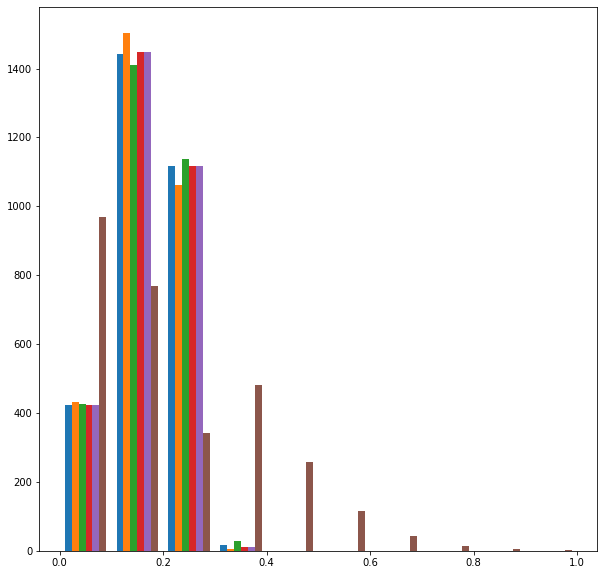

In [167]:
plt.figure(figsize=(10,10))
plt.hist(train,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

(array([[  0.,   0.,   0., 264., 498., 222., 252., 314., 116.,  51.],
        [  0.,   0.,   0., 287., 482., 211., 274., 296., 117.,  50.],
        [  0.,   0.,   0., 244., 518., 211., 254., 325., 110.,  55.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [ 27., 537., 881., 178.,  50.,  23.,  14.,   7.,   0.,   0.]]),
 array([0.08472581, 0.17625323, 0.26778064, 0.35930806, 0.45083548,
        0.5423629 , 0.63389032, 0.72541774, 0.81694516, 0.90847258,
        1.        ]),
 <a list of 6 Lists of Patches objects>)

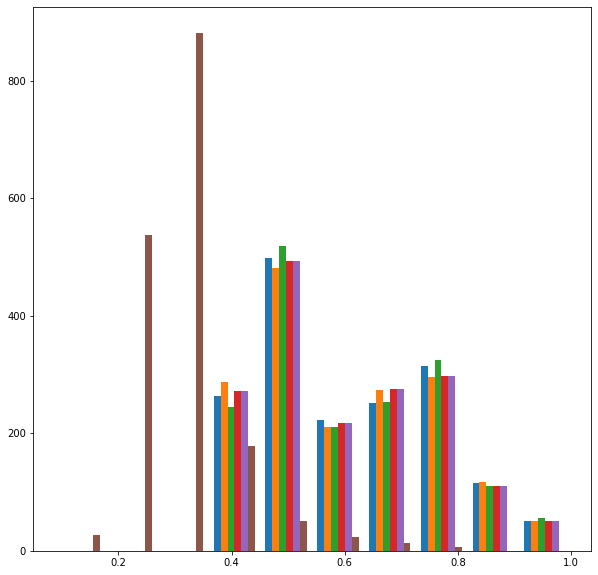

In [168]:
plt.figure(figsize=(10,10))
plt.hist(test,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

In [169]:
#scaled_train_samples=scaler.fit_transform(train)
#scaled_test_samples=scaler.fit_transform(test) 

In [170]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)


In [171]:
time_stamp=100
x_train, y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

In [172]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(2899, 100)
(1616, 100)
[0.24944724 0.24337194 0.24215896 ... 0.17788499 0.17932668 0.1967208 ]
[0.24944724 0.24337194 0.24215896 ... 0.24193022 0.24361105 0.24592612]


# start building the model

In [173]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [174]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.39067256 0.38843719 0.38602857 ... 0.41589207 0.41681048 0.41533757]
 [0.38843719 0.38602857 0.38591418 ... 0.41681048 0.41533757 0.41092928]
 [0.38602857 0.38591418 0.38436851 ... 0.41533757 0.41092928 0.41293243]
 ...
 [0.78033655 0.75891195 0.74016968 ... 0.92449042 0.9281362  0.90324942]
 [0.75891195 0.74016968 0.7588391  ... 0.9281362  0.90324942 0.90677743]
 [0.74016968 0.7588391  0.76378113 ... 0.90324942 0.90677743 0.9152198 ]]
[[0.2737761  0.26891378 0.24957547 ... 0.25218507 0.25002598 0.24071724]
 [0.26891378 0.24957547 0.25050771 ... 0.25002598 0.24071724 0.24944724]
 [0.24957547 0.25050771 0.25097209 ... 0.24071724 0.24944724 0.24337194]
 ...
 [0.23327649 0.2301297  0.22191608 ... 0.17612442 0.16708948 0.1661399 ]
 [0.2301297  0.22191608 0.22012779 ... 0.16708948 0.1661399  0.17788499]
 [0.22191608 0.22012779 0.221268   ... 0.1661399  0.17788499 0.17932668]]
(2899, 100)


In [175]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [176]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [177]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [178]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [179]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [180]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 3s 20ms/step - loss: 0.0019 - val_loss: 9.6554e-04
Epoch 2/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0018 - val_loss: 7.5282e-04
Epoch 4/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 5/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 6/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0024 - val_loss: 0.0066
Epoch 7/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0030 - val_loss: 0.0066
Epoch 8/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0058
Epoch 9/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 10/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0028 

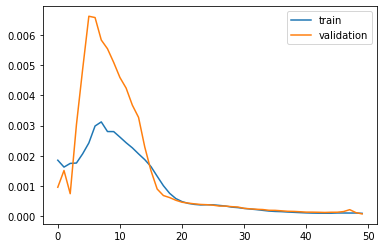

In [181]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [182]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [183]:
train_predict.shape

(2899, 1)

In [184]:
test_predict.shape

(1616, 1)

In [185]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

In [186]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.374765  ],
       [0.3721127 ],
       [0.3726016 ],
       ...,
       [0.7143028 ],
       

In [187]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.3820130736656121

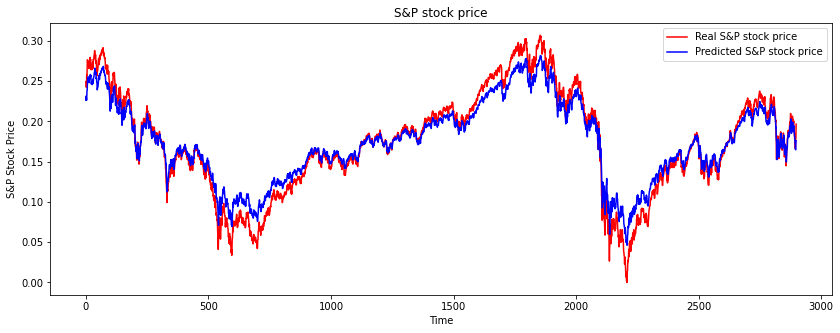

In [188]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [189]:
model=Sequential()
model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [190]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 2s 13ms/step - loss: 0.0023 - val_loss: 1.8253e-04
Epoch 2/50
164/164 [==============================] - 2s 10ms/step - loss: 7.7468e-04 - val_loss: 1.8696e-04
Epoch 3/50
164/164 [==============================] - 2s 10ms/step - loss: 8.0984e-04 - val_loss: 2.0595e-04
Epoch 4/50
164/164 [==============================] - 2s 10ms/step - loss: 8.6025e-04 - val_loss: 2.8331e-04
Epoch 5/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0011 - val_loss: 3.6826e-04
Epoch 6/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0012 - val_loss: 9.4966e-04
Epoch 7/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 8/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 9/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 10/50
164/164 [==============================] - 

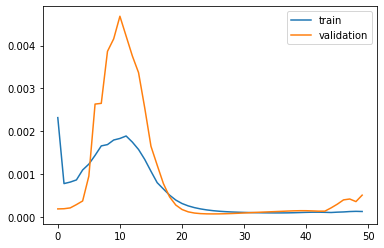

In [191]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [192]:
train_predict.shape

(2899, 1)

In [193]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [194]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.02250574757701959

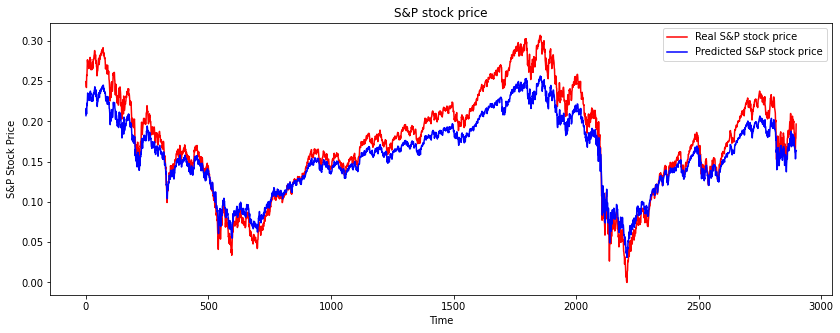

In [195]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [196]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(layer = tf.keras.layers.Dropout(.2,))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(tf.keras.layers.Dropout(.2,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))


In [197]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=20,batch_size=16,verbose=1,)

Epoch 1/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0022 - val_loss: 3.5179e-04
Epoch 2/20
164/164 [==============================] - 2s 11ms/step - loss: 0.0012 - val_loss: 2.3536e-04
Epoch 3/20
164/164 [==============================] - 2s 11ms/step - loss: 0.0012 - val_loss: 2.8485e-04
Epoch 4/20
164/164 [==============================] - 2s 10ms/step - loss: 0.0014 - val_loss: 8.8397e-04
Epoch 5/20
164/164 [==============================] - 2s 11ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 6/20
164/164 [==============================] - 2s 10ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 7/20
164/164 [==============================] - 2s 10ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 8/20
164/164 [==============================] - 2s 10ms/step - loss: 0.0022 - val_loss: 0.0054
Epoch 9/20
164/164 [==============================] - 2s 11ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 10/20
164/164 [==============================] - 2s 11ms/step - loss:

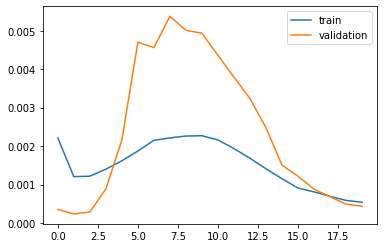

In [198]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [199]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [200]:
print(train_predict.shape)
print(test_predict.shape)

(2899, 1)
(1616, 1)


In [201]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.026334945134100694

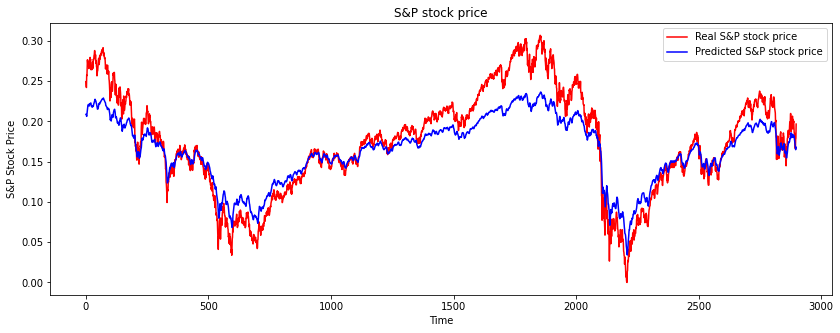

In [202]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()